FFR 120  
Felix Waldschock

HW 2  
Exercise 7.3

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


In [46]:
# parameters
sigma0 = 1
dSigma = 1.8 
L = 100
dT = 0.01
x0 = 0

In [47]:
def getSigma(x):
    return sigma0 + dSigma*x/L

In [48]:
def updatePos(x):
    sigma = getSigma(x)
    o = sigma + np.sqrt(dT)
    # randomly choose direction
    direction = np.random.choice([-1,1])
    return x + direction*o

In [49]:
# check boundary conditions
def checkBoundary(x, L):
    Lh = L / 2
    if (x < -Lh):
        x = - L - x
    elif ((-Lh <= x) and (x <= Lh)):
        x = x
    elif (x > Lh):
        x = L - x
    return x
    

In [50]:
# Simulate
N = 10000                                   # number of trajectiories (particles)
T_tot = [1, 10, 1000, 10000]              # total time
T_tot = [1, 10, 1000, 10000, 100000]      # total time
T_tot = np.array(T_tot)
Iteration_Steps = T_tot * (1 / dT)          # total number of steps 
max_steps = int(np.max(Iteration_Steps))


In [51]:
# improved version with using vectorizing of numpy
def simulate_trajectory(N, max_steps, L):
    x = np.ones(N)*x0
    trajectories = np.zeros((N, len(T_tot)))    # array to store trajectories  
    sigmas_ = np.zeros(N)         # array to store sigmas
    for s in trange(max_steps):
        # calc new sigma
        sigma = getSigma(x)
        o = sigma + np.sqrt(dT)
        directions = np.random.choice([-1, 1], N)
        x += directions * o
        
        # check boundaries and apply correction
        x = np.where(x < -L/2, -L - x, x)
        x = np.where(x > L/2, L - x, x)
        
        if s in Iteration_Steps:
            index = np.where(Iteration_Steps == s)[0][0]
            trajectories[:, index] = x

    trajectories[:, -1] = x
    sigmas_ = sigma

    return trajectories, sigmas_

trajectories, sigmas_ = simulate_trajectory(N, max_steps, L)


 26%|██▌       | 2575671/10000000 [05:45<25:06, 4926.64it/s]

In [ ]:
# save the trajectories to a file
if(1):
    np.save('Simulated_Data/trajectories_73.npy', trajectories)
    np.save('Simulated_Data/sigmas_73.npy', sigmas_)


IndexError: index 4 is out of bounds for axis 1 with size 4

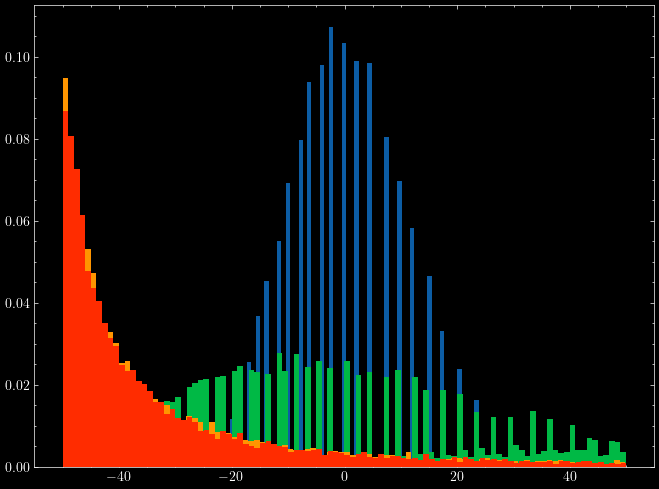

In [ ]:
# load the trajectories from a file
trajectories = np.load('Simulated_Data/trajectories_73.npy')
sigmas_ = np.load('Simulated_Data/sigmas_73.npy')
bins = 100

# plot the trajectories in one histogram
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(trajectories[:, 0], bins=bins, density=True, label='T = 10')
plt.hist(trajectories[:, 1], bins=bins, density=True, label='T = 100')
plt.hist(trajectories[:, 2], bins=bins, density=True, label='T = 1000')
plt.hist(trajectories[:, 3], bins=bins, density=True, label='T = 10000')
plt.hist(trajectories[:, 4], bins=bins, density=True, label='T = 100000')
plt.xlabel('x')
plt.legend()
ax.set_yticklabels([])
plt.show()

# plot the sigmas
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(sigmas_, bins=50, label='sigmas')
plt.xlabel('x')
ax.set_yticklabels([])
plt.show()

In [ ]:
# print the means of the trajectories
print('mean of the trajectories:')
for i in range(len(T_tot)):
    print('T = {}: {}'.format(T_tot[i], np.mean(trajectories[:, i])))

mean of the trajectories:
T = 10: -6.449941626908426
T = 100: -31.208133651621715
T = 1000: -32.60350274683046
T = 10000: -32.446485415070796
T = 100000: -32.76278469712048
